Exercise goes here.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# 1 Generate 2 blobs with sklearns make_blobs.
data, target = make_blobs(n_samples=150, centers=2, n_features=2, cluster_std=0.5, random_state=0)
# 1.a - Look at the dataset (Show the first line of the matrix)
print(data[0:1,:]) # First line
print(len(data),len(target))
#print(target)
#print(data)

[[2.4484315  0.66445411]]
150 150


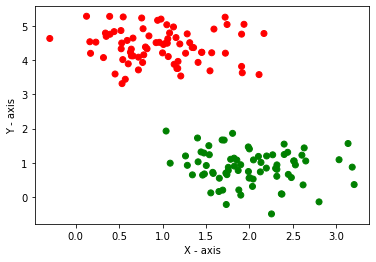

In [3]:
# 2 Scatterplot the dataset with matplotlib
# 2.a - Use different colors for each of the n_features, created in the blob data. - I use red and green
col = "red green".split()
x = data[:,0] #All rows column 1
y = data[:,1] #All rows column 2

plt.scatter(x, y, c=target, cmap=colors.ListedColormap(col))
plt.ylabel("Y - axis")
plt.xlabel("X - axis")
plt.show()

In [4]:
# 3 Use the "activation_function" and "perceptron" fuction given in the "12-1-Perceptron-Classifier".
def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1

def perceptron(inp, weights):
    """
    Given a list of feature (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    dot_product = np.dot(inp, weights)
    output = activation_function(dot_product)
    return output

In [5]:
# 4 Use the "pla" function given in the "12-1-Perceptron-Classifier".
from tqdm import tqdm
def pla(training_data, no_iterations=1000000, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    Parameters:
    training_data: list of vectors (features), as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    """
    dim = len(training_data[0][0]) # len = 2 (x and y from earlier)
    weights =  np.random.random(dim) # error and weights (for x and y) start out as random numbers
    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]
    for i in tqdm(range(no_iterations)):
        inp_vec, expected_label = training_data[i % len(training_data)] # get the next feature set and label (start over after reaching end)
        perceptron_output = perceptron(inp_vec, weights) # perceptron output id a decimal between 0 and 1
        error = expected_label - perceptron_output       # error 
        weights += eta * error * inp_vec # accumulate the weights
        weight_history.append(np.copy(weights))
    return weights, weight_history 



In [6]:
# 5 In exercise 1 we found out that our data_blob set only contains 1 and 0 as target values.
# 5.a - Turn all the 0's into -1's. Now when we print our target, we should only have, 1 and -1.
target[target == 0] = -1
print(target)

# 5.b - Turn all the new targets with our daata into an array that has the following format;
# [(array([data.x, data.y]), 1), (array([data.x, data.y]), -1)]
# Note that the 1 and -1 are our target values.
trainings_data_blobs = [(d, t) for d, t in zip(data, target)]
#print(trainings_data_blobs)

[ 1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1
  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1
 -1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1
  1  1 -1  1 -1  1]


In [7]:
# 6 Using the pla function that we used copied in before, find the learned_weights of our training data from 5.b
learned_weights, weight_history = pla(trainings_data_blobs)
print(learned_weights)

100%|██████████| 1000000/1000000 [00:15<00:00, 64988.70it/s][ 19.40406972 -15.84781916]



In [8]:
# 7 Use the "predict" function given in "12-1-Perceptron-Classifier".
# 7.a - Try to see if we can predict a couple of values to be either 1 og -1
def predict(inp_vec, weights):
    """
    Parameters:
    inp_vec:
        An input vector consisting of y and x
    weights:
        A vector of same length as inp_vec, containing a weight for each input
    return:
        A class label, either 1(red) or -1(green)
    """
    class_label_prediction = perceptron(inp_vec, weights)
    return class_label_prediction

print(predict([1, 1], learned_weights))
print(predict([0, 2], learned_weights))
print(predict([1, 3], learned_weights))
print(predict([4, 4], learned_weights))
print(predict([3, 5], learned_weights))
print(predict([6, 6], learned_weights))

1
-1
-1
1
-1
1


(1.2243999957904925, 0.774509399733447)


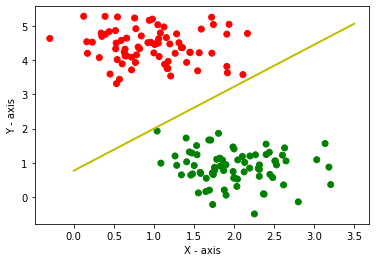

In [9]:
# 8 Visualize the linear seperability by using the "compute_line" function given in "12-1-Perceptron-Classifier".
def compute_line(weights):
    """
    Visualizing Linear Separability by using weights/norm(weights) wich are othogonal to the division line.
    Parameters:
    weights: the weights calculated by PLA
    """
    norm = np.linalg.norm(weights) # calculating the frobenius norm adjusting values measured on different scales to a notionally common scale
    ww = weights / norm # weight vector is perpendicular (or othogonal) to the division line
    ww1 = [ww[1], -ww[0]] # first point on our division line
    ww2 = [-ww[1] , ww[0]] # second point on our division line
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0]) # slope = delta y / delta x
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]      # intercept = delta x * slope + y(x1)
    # print('slope:',m,'bias',b)
    return m, b


print(compute_line(learned_weights))
plt.scatter(x, y, c=target, cmap=colors.ListedColormap(col))

l = np.linspace(0, 3.5) # https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
m, b = compute_line(learned_weights) # m = slope, b = intercept
plt.plot(l, m * l + b, 'y-', lw=2) # lw is line width

plt.ylabel("Y - axis")
plt.xlabel("X - axis")
plt.show()